# Negative binominal regression along both axes

In [2393]:
seq = loadData_v1(path_input, exp_id, 'seq', 'DataFrame')

## Select all genes which were either fitted to pseudotime or pseudospace; if gene has no p-value along one axis, set to 1

In [2394]:
IFE_fitted = loadData_v1(path_output, exp_id, 'IFE_fitted', 'DataFrame')
IFE_stats = loadData_v1(path_output, exp_id, 'IFE_stats', 'DataFrame')

In [2395]:
spatial_fitted = loadData_v1(path_output, exp_id, 'spatial_fitted', 'DataFrame')
spatial_stats = loadData_v1(path_output, exp_id, 'spatial_stats', 'DataFrame')

In [2396]:
PST_stats = pd.DataFrame(1, index = list(set(IFE_stats.index) | set(spatial_stats.index)), columns = ['PT', 'PS'])

PST_stats.ix[IFE_stats.index, 'PT'] = IFE_stats['Pr(>Chisq)']
PST_stats.ix[spatial_stats.index, 'PS'] = spatial_stats['Pr(>Chisq)']

In [2397]:
len(PST_stats.index)

7893

## Identify genes which are pseudotime-dependent, pseudospace-dependent, neither or both

In [2398]:
bonferroni_IFE = 0.001 / len(IFE_stats.index)
bonferroni_spatial = 0.001 / len(spatial_stats.index)

In [2399]:
PST_genes = pd.Series(index = PST_stats.index)

for g in PST_genes.index:
    
    if PST_stats.ix[g, 'PT'] > bonferroni_IFE and PST_stats.ix[g, 'PS'] > bonferroni_spatial:
        PST_genes.ix[g] = 0
        
    elif PST_stats.ix[g, 'PT'] < bonferroni_IFE and PST_stats.ix[g, 'PS'] > bonferroni_spatial:
        PST_genes.ix[g] = 1
        
    elif PST_stats.ix[g, 'PT'] > bonferroni_IFE and PST_stats.ix[g, 'PS'] < bonferroni_spatial:
        PST_genes.ix[g] = 2
        
    elif PST_stats.ix[g, 'PT'] < bonferroni_IFE and PST_stats.ix[g, 'PS'] < bonferroni_spatial:
        PST_genes.ix[g] = 3

In [2400]:
for gr in set(PST_genes):
    
    print gr, len(PST_genes[PST_genes==gr].index)

0.0 5937
1.0 1409
2.0 329
3.0 218


## Remove genes which are both pseudospace/pseudotime-dependent and recorrelate both axes

In [2401]:
PT_corr = PTO_correlate(log2Transform(seq), 
                        log2Transform(IFE_fitted), 
                        s_groups_1st.index, 
                        PST_genes[PST_genes == 1].index, 
                        return_p = False)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [2402]:
PS_corr = PTO_correlate(log2Transform(seq), 
                        log2Transform(spatial_fitted), 
                        s_groups_1st.index, 
                        PST_genes[PST_genes == 2].index, 
                        return_p = False)


Calculating binary logarithm of x + 1

Calculating binary logarithm of x + 1


In [2403]:
PT_corr_max = PTO_correlate_find_max(PT_corr)

In [2404]:
PS_corr_max = PTO_correlate_find_max(PS_corr)

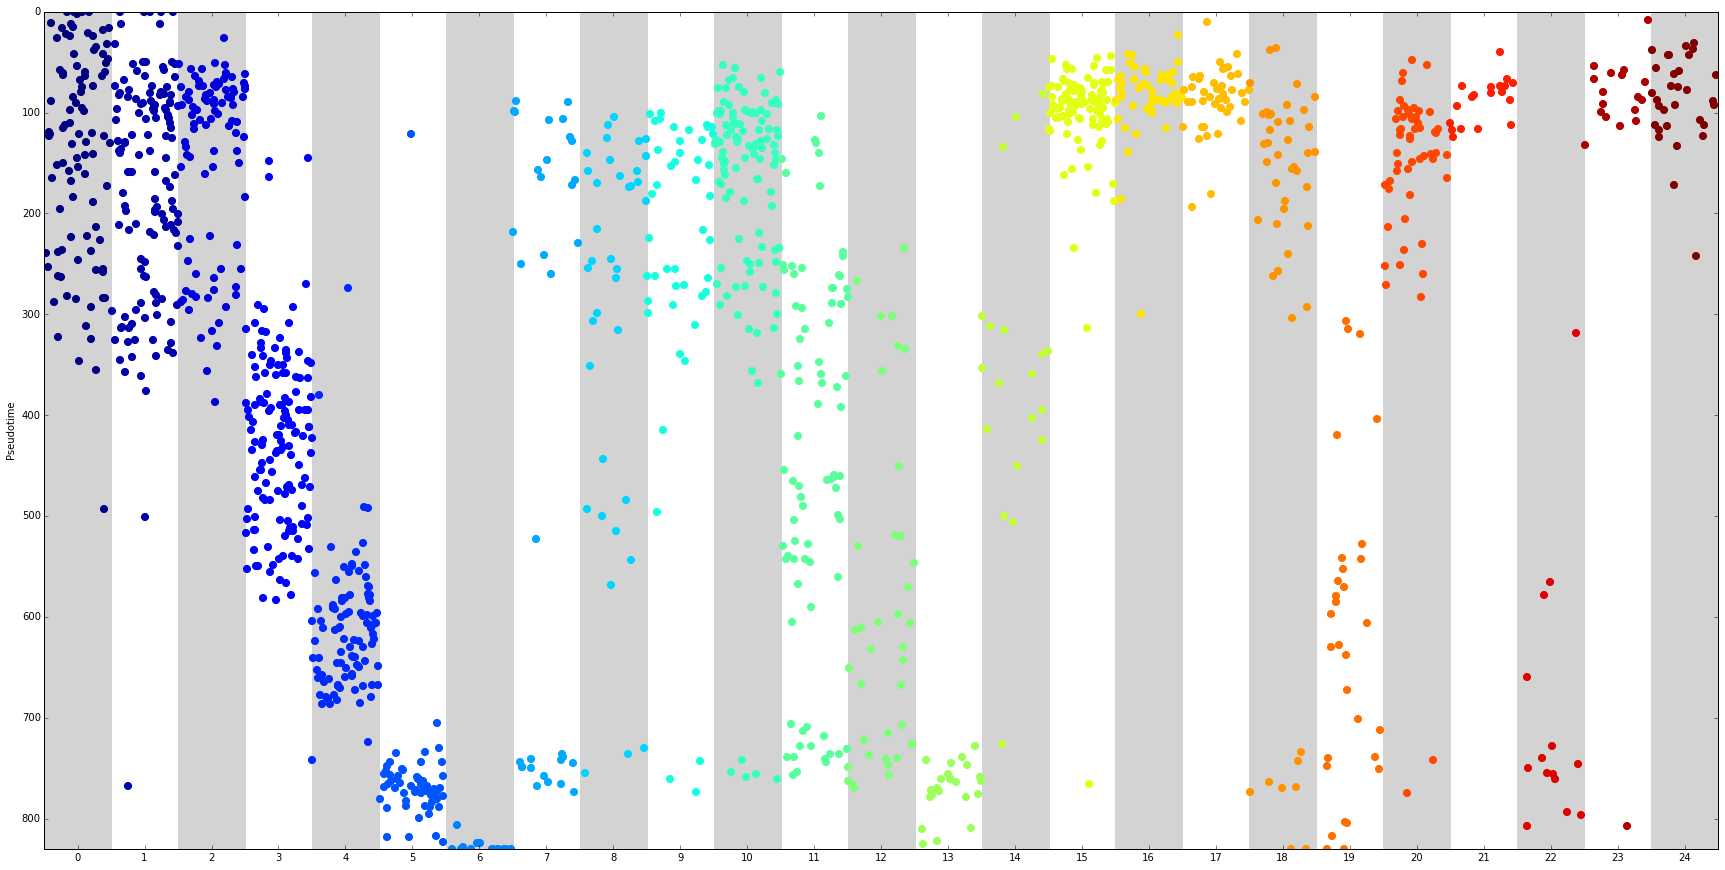

In [2405]:
data = PT_corr_max
cell_groups = s_groups_2nd
cmap = plt.cm.jet

#initialize figure

height = 15
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot()

ax.set_ylim(np.max(data),0)
ax.set_ylabel('Pseudotime')

ax.set_xlim(-0.5, len(return_unique(cell_groups)) - 0.5)
ax.set_xticks(range(len(return_unique(cell_groups))))
ax.set_xticklabels(return_unique(cell_groups))

#plot data

for pos, gr in enumerate(return_unique(cell_groups)):
    
    cell_ix_tmp = cell_groups[cell_groups==gr].index
    
    ax.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                [float(data[ix]) for ix in cell_ix_tmp],
                color = cmap(gr / float(np.max(cell_groups))),
                s = 50)
    
    #plot background
    
    if pos % 2 == 0:
        
        ax.axvspan(pos - 0.5, pos + 0.5, color = 'lightgrey', zorder = 0)

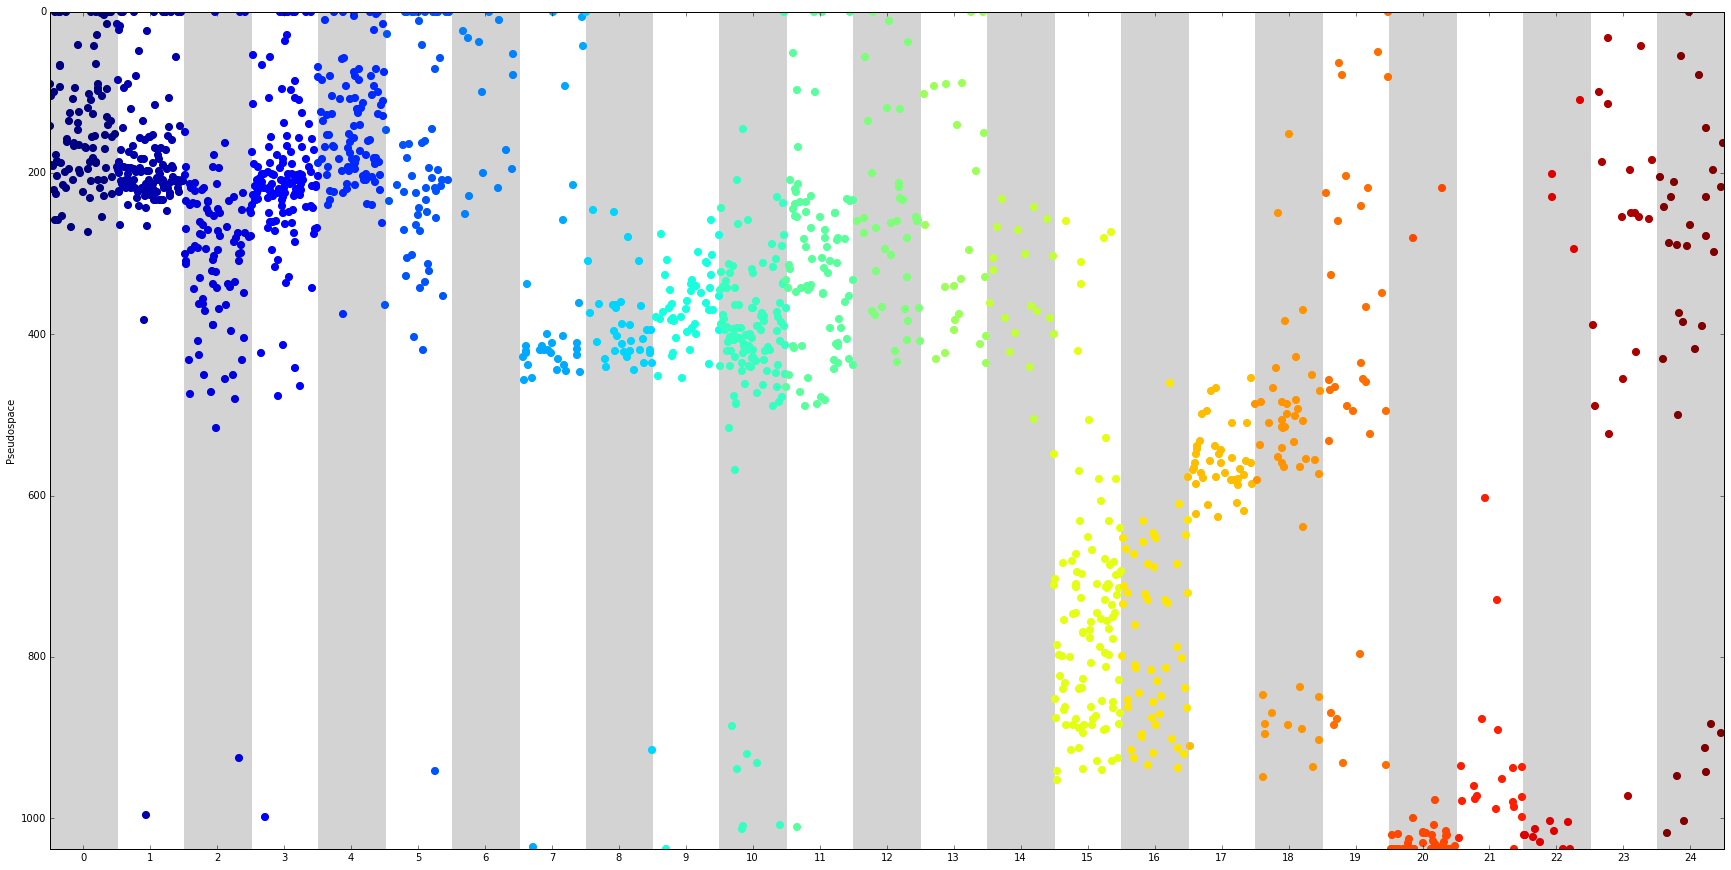

In [2406]:
data = PS_corr_max
cell_groups = s_groups_2nd
cmap = plt.cm.jet

#initialize figure

height = 15
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot()

ax.set_ylim(np.max(data),0)
ax.set_ylabel('Pseudospace')

ax.set_xlim(-0.5, len(return_unique(cell_groups)) - 0.5)
ax.set_xticks(range(len(return_unique(cell_groups))))
ax.set_xticklabels(return_unique(cell_groups))

#plot data

for pos, gr in enumerate(return_unique(cell_groups)):
    
    cell_ix_tmp = cell_groups[cell_groups==gr].index
    
    ax.scatter([pos - 0.5 + np.random.random() for x in range(len(cell_ix_tmp))],
                [float(data[ix]) for ix in cell_ix_tmp],
                color = cmap(gr / float(np.max(cell_groups))),
                s = 50)
    
    #plot background
    
    if pos % 2 == 0:
        
        ax.axvspan(pos - 0.5, pos + 0.5, color = 'lightgrey', zorder = 0)

## Checkpoint

In [2407]:
saveData_v1(PT_corr_max, path_output, exp_id, 'PT_corr_max')
saveData_v1(PS_corr_max, path_output, exp_id, 'PS_corr_max')

In [275]:
PT_corr_max = loadData_v1(path_output, exp_id, 'PT_corr_max', 'Series')
PS_corr_max = loadData_v1(path_output, exp_id, 'PS_corr_max', 'Series')

## Define predictor matrix

In [276]:
seq_ = dropNull(seq, path_input, cutoff_mean = 0.00)


Dropping spikes from dataset

Dropping repeats from dataset

Dropping unexpressed genes from dataset


In [277]:
s_groups_1st = loadData_v1(path_output, exp_id, 's_groups_1st', 'Series')
s_groups_2nd = loadData_v1(path_output, exp_id, 's_groups_2nd', 'Series')

In [278]:
n_bins = 15
PT_names = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
PS_names = [str(x) for x in range(26)]

In [279]:
#define model
    
model = """
    data {
        int<lower=0> N; # number of outcomes
        int<lower=0> K; # number of predictors
        matrix<lower=0>[N,K] x; # predictor matrix
        int y[N]; # outcomes
    }

    parameters {
        vector<lower=1>[K] beta; # coefficients
        real<lower=0.001> r; # overdispersion
    }

    model {
        vector[N] mu;
        vector[N] rv; 
        
        # priors
        r ~ cauchy(0,1);
        beta ~ pareto(1,1.5);

        # vectorize the overdispersion
        for (n in 1:N) {
                rv[n] <- square(r + 1) - 1;
        }

        #regression
        mu <- x * (beta - 1) + 0.001;
        y ~ neg_binomial(mu ./ rv, 1 / rv[1]);
    }
    """

In [280]:
#number of outcomes
    
N = len(s_groups_2nd.index)
print N

1422


In [281]:
#predictor matrix 
    
NxK = pd.DataFrame(0, 
                   columns = s_groups_1st.index, 
                   index = [str(x) for x in PT_names[:n_bins]] + [str(y) for y in PS_names[:n_bins]] + ['SG','SG_opening','Immune','TC','LH','Baseline'] )

#Baseline

NxK.ix['Baseline'] = seq_[NxK.columns].sum(axis = 0) / seq_[NxK.columns].sum(axis = 0).mean()

#Pseudotime dependent cells (excluding immune cells, SG, uHF 1 - 3 and K6 1)

ix_sel = s_groups_2nd[~s_groups_2nd.isin([7,8,9,14,20,23,24])].index

PT_bins = PTO_bin_axis(PT_corr_max[ix_sel], n_bins, (0,831), PT_names)[1]

for ix in PT_bins.index:
    
    NxK.ix[PT_bins[ix], ix] = 1
    
#Pseudospace dependent cells (excluding immune cells, SG)

ix_sel = s_groups_2nd[~s_groups_2nd.isin([14,23,24])].index

PS_bins = PTO_bin_axis(PS_corr_max[ix_sel], n_bins, (0,1039), PS_names)[1]

for ix in PS_bins.index:
    
    NxK.ix[PS_bins[ix], ix] = 1
    
#SG signature

ix_sel = s_groups_2nd[s_groups_2nd.isin([14])].index

NxK.ix['SG', ix_sel] = 1

#SG opening signature

ix_sel = s_groups_2nd[s_groups_2nd.isin([7,8])].index

NxK.ix['SG_opening', ix_sel] = 1

#pan-immune signature

ix_sel = s_groups_2nd[s_groups_2nd.isin([23,24])].index

NxK.ix['Immune', ix_sel] = 1

#TC signature

ix_sel = s_groups_2nd[s_groups_2nd.isin([23])].index

NxK.ix['TC', ix_sel] = 1

#LH signature

ix_sel = s_groups_2nd[s_groups_2nd.isin([24])].index

NxK.ix['LH', ix_sel] = 1

In [282]:
#number of predictors
    
K = len(NxK.index)
print K

36


In [283]:
NxK.sum(axis=1)

A               61
B              311
C              146
D               53
E               65
F               80
G               55
H               46
I               37
J               54
K               54
L               44
M               30
N              101
O               49
0              103
1               84
2              185
3              277
4              117
5              136
6              116
7               43
8               37
9               25
10              38
11              27
12              52
13              34
14              80
SG              19
SG_opening      69
Immune          49
TC              18
LH              31
Baseline      1422
dtype: float64

## Checkpoint

In [2443]:
saveData_to_pickle_v1(NxK, path_output, exp_id, 'NBR_global_NxK')

## For comparability, select the same genes used for NBR_2nd

In [284]:
NBR_2nd_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_2nd_traces')

In [285]:
genes_sel = NBR_2nd_traces.index

In [286]:
len(genes_sel)

9784

## Run regression

In [43]:
"""
NBR_global_traces = neg_binom_regression_free_input_v2P(model, 
                                                    seq_,
                                                    genes_sel,
                                                    N, 
                                                    K, 
                                                    NxK, 
                                                    path_output, 
                                                    exp_id, 
                                                    'NBR_global_traces', 
                                                    5000, 
                                                    dview, 
                                                    iter=275, 
                                                    chains=4, 
                                                    warmup=25, 
                                                    n_jobs=4)
"""

"\nNBR_global_traces = neg_binom_regression_free_input_v2P(model, \n                                                    seq_,\n                                                    genes_sel,\n                                                    N, \n                                                    K, \n                                                    NxK, \n                                                    path_output, \n                                                    exp_id, \n                                                    'NBR_global_traces', \n                                                    5000, \n                                                    dview, \n                                                    iter=275, \n                                                    chains=4, \n                                                    warmup=25, \n                                                    n_jobs=4)\n"

In [2455]:
NBR_global_summary = neg_binom_summary_stats_v1P(NBR_global_traces, dview)

In [2456]:
NBR_global_bin_bl, NBR_global_size_bl = neg_binom_vs_baseline_v1P(NBR_global_summary, dview, PP='95')

In [2457]:
NBR_global_bin_gr, NBR_global_size_gr = neg_binom_vs_groups_v1P(NBR_global_summary, dview, PP = '95')

In [2458]:
#saveData_to_pickle_v1(NBR_global_summary, path_output, exp_id,'NBR_global_summary')
#saveData_to_pickle_v1(NBR_global_bin_bl,path_output,exp_id,'NBR_global_bin_bl')
#saveData_to_pickle_v1(NBR_global_size_bl,path_output,exp_id,'NBR_global_size_bl')
#saveData_to_pickle_v1(NBR_global_bin_gr,path_output,exp_id,'NBR_global_bin_gr')
#saveData_to_pickle_v1(NBR_global_size_gr,path_output,exp_id,'NBR_global_size_gr')

## Shuffle predictor matrix along axis = 1

In [43]:
NxK_shf = pd.DataFrame(index = NxK.index, columns = NxK.columns)

for ix in NxK_shf.index:
    
    ix_tmp = NxK.copy().ix[ix]
    
    np.random.shuffle(ix_tmp)
    
    NxK_shf.ix[ix] = ix_tmp

In [48]:
NxK_shf.sum(axis=1)

A               61
B              311
C              146
D               53
E               65
F               80
G               55
H               46
I               37
J               54
K               54
L               44
M               30
N              101
O               49
0              103
1               84
2              185
3              277
4              117
5              136
6              116
7               43
8               37
9               25
10              38
11              27
12              52
13              34
14              80
SG              19
SG_opening      69
Immune          49
TC              18
LH              31
Baseline      1422
dtype: float64

In [45]:
#saveData_to_pickle_v1(NxK_shf, path_output, exp_id, 'NBR_global_NxK_shf')

In [287]:
NxK_shf = loadData_from_pickle_v1(path_output, exp_id, 'NBR_global_NxK_shf').astype(float)

## Run regression with shuffled data

In [ ]:
NBR_global_shf_traces = neg_binom_regression_free_input_v2P(model, 
                                                    seq_,
                                                    genes_sel,
                                                    N, 
                                                    K, 
                                                    NxK_shf, 
                                                    path_output, 
                                                    exp_id, 
                                                    'NBR_global_shf_traces', 
                                                    1000, 
                                                    dview, 
                                                    iter=275, 
                                                    chains=4, 
                                                    warmup=25,
                                                    n_jobs=4)